# How do Airbnb listing densities differ between New York City and Toronto?

### Data Cleaning

In [97]:

import pandas as pd

listings_nyc = pd.read_csv("/content/drive/MyDrive/Project/Data/listings_nyc.csv")

# Read the Toronto Airbnb listings data from a CSV file
listings_toronto = pd.read_csv("/content/drive/MyDrive/Project/Data/listings_toronto.csv")


In [98]:

num_columns_nyc = len(listings_nyc.columns)
num_columns_toronto = len(listings_toronto.columns)


column_names_nyc = set(listings_nyc.columns)
column_names_toronto = set(listings_toronto.columns)


print("Number of columns in NYC dataset:", num_columns_nyc)
print("Number of columns in Toronto dataset:", num_columns_toronto)
print("Column names in NYC dataset:", column_names_nyc)
print("Column names in Toronto dataset:", column_names_toronto)

# Check if the column names are identical
if column_names_nyc == column_names_toronto:
  print("Column names are identical in both datasets.")
else:
  print("Column names differ between the datasets.")


Number of columns in NYC dataset: 18
Number of columns in Toronto dataset: 18
Column names in NYC dataset: {'minimum_nights', 'host_id', 'id', 'calculated_host_listings_count', 'room_type', 'reviews_per_month', 'name', 'latitude', 'neighbourhood_group', 'price', 'last_review', 'availability_365', 'number_of_reviews_ltm', 'license', 'neighbourhood', 'longitude', 'host_name', 'number_of_reviews'}
Column names in Toronto dataset: {'minimum_nights', 'host_id', 'id', 'calculated_host_listings_count', 'room_type', 'reviews_per_month', 'name', 'latitude', 'neighbourhood_group', 'price', 'last_review', 'availability_365', 'number_of_reviews_ltm', 'license', 'neighbourhood', 'longitude', 'host_name', 'number_of_reviews'}
Column names are identical in both datasets.


In [99]:


# Drop unnecessary columns from both datasets
columns_to_drop = ['name', 'last_review', 'reviews_per_month', "host_name", "number_of_reviews",'number_of_reviews_ltm']


listings_toronto.drop(columns=columns_to_drop, inplace=True)
listings_nyc.drop(columns=columns_to_drop, inplace=True)

# Check for missing values in both datasets
missing_values_nyc = listings_nyc.isnull().sum()
missing_values_toronto = listings_toronto.isnull().sum()


In [100]:
listings_nyc = listings_nyc[listings_nyc['price'].notna()]
listings_toronto = listings_toronto[listings_toronto['price'].notna()]


In [101]:
listings_nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,license
0,977395984065981849,95344065,Brooklyn,Sheepshead Bay,40.591790,-73.942850,Private room,30.0,31,7,339,NaN
1,729947657876634696,566660,Bronx,Longwood,40.827373,-73.903147,Private room,29.0,30,2,34,NaN
2,648033676238017128,421601513,Bronx,Kingsbridge,40.863940,-73.903120,Private room,30.0,30,3,359,NaN
3,623137142536549768,106442885,Brooklyn,East New York,40.660730,-73.890500,Entire home/apt,76.0,30,1,364,NaN
4,871990853610302281,484563208,Queens,Howard Beach,40.663586,-73.834532,Private room,85.0,30,2,89,NaN


## Create Heatmap

In [102]:
import folium
import folium.plugins as plugins
from IPython.display import IFrame



# Create a base map for New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
# Create a heatmap layer for New York City listings
nyc_heatmap = plugins.HeatMap(listings_nyc[['latitude', 'longitude']].values.tolist(), radius=20)
# Add the heatmap layer to the map
nyc_map.add_child(nyc_heatmap)


toronto_map = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

toronto_heatmap = plugins.HeatMap(listings_toronto[['latitude', 'longitude']].values.tolist(), radius=20)

toronto_map.add_child(toronto_heatmap)

# Save maps to HTML files
nyc_map.save('nyc_map.html')
toronto_map.save('toronto_map.html')




## Density Analysis

In [103]:
import pandas as pd
import numpy as np



def calculate_density(df):
    #bin sizes
    lat_bin_size = 0.01  # approximately 1 km at the equator
    lon_bin_size = 0.01

    # bin the latitude and longitude
    df['lat_bin'] = np.round(df['latitude'] / lat_bin_size) * lat_bin_size
    df['lon_bin'] = np.round(df['longitude'] / lon_bin_size) * lon_bin_size

    # group by binned latitude and longitude, and count listings
    grouped = df.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='counts')

    km_per_degree_latitude = 111  # rough estimate. can vary, but toronto is relatively flat
    area_per_bin_km2 = (lat_bin_size * km_per_degree_latitude) * (lon_bin_size * km_per_degree_latitude)  # Simplified

    # calculate density as listings per square kilometer
    grouped['density'] = grouped['counts'] / area_per_bin_km2

    return grouped

nyc_density = calculate_density(listings_nyc)
toronto_density = calculate_density(listings_toronto)


print("NYC Density Data:\n", nyc_density.head())
print("\nToronto Density Data:\n", toronto_density.head())




NYC Density Data:
    lat_bin  lon_bin  counts   density
0    40.50   -74.25       1  0.811622
1    40.50   -74.24       1  0.811622
2    40.51   -74.25       1  0.811622
3    40.51   -74.24       2  1.623245
4    40.52   -74.22       2  1.623245

Toronto Density Data:
    lat_bin  lon_bin  counts    density
0    43.59   -79.55       2   1.623245
1    43.59   -79.54      36  29.218408
2    43.59   -79.53      13  10.551092
3    43.59   -79.52       1   0.811622
4    43.59   -79.51       3   2.434867


Average density in NYC: 28.461909808574386
Average density in Toronto: 20.59460899034417
Median density in NYC: 8.927846765684603
Median density in Toronto: 8.116224332440547
Maximum count in NYC: 766
Maximum count in Toronto: 873


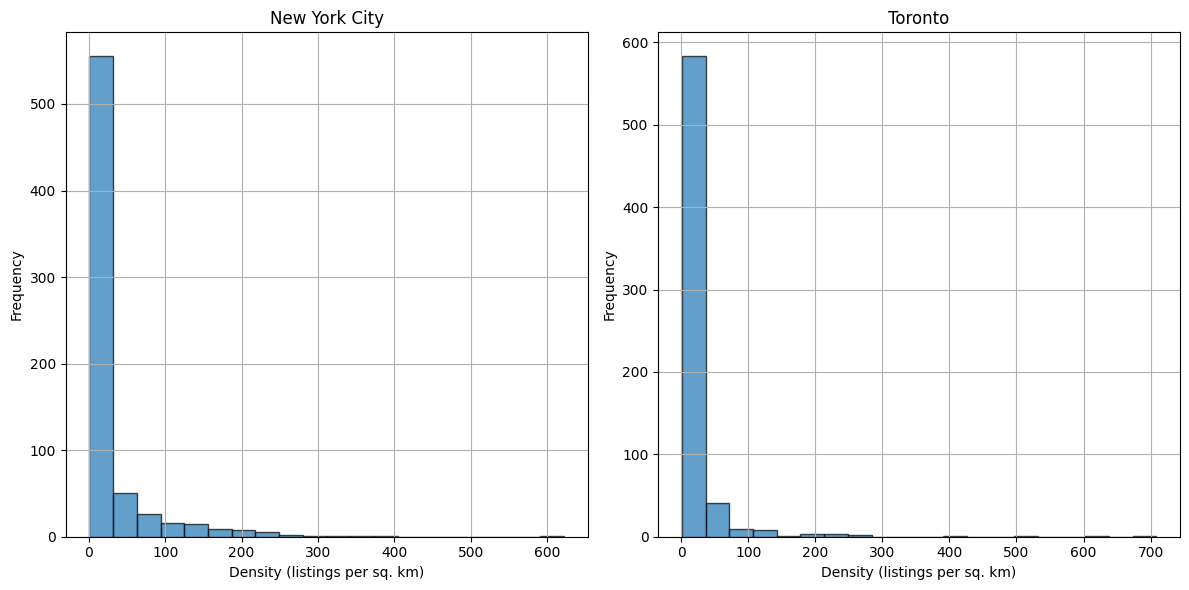

In [104]:

print("Average density in NYC:", nyc_density['density'].mean())
print("Average density in Toronto:", toronto_density['density'].mean())

print("Median density in NYC:", nyc_density['density'].median())
print("Median density in Toronto:", toronto_density['density'].median())


print("Maximum count in NYC:", nyc_density['counts'].max())
print("Maximum count in Toronto:", toronto_density['counts'].max())


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nyc_density['density'].hist(bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Density (listings per sq. km)')
plt.ylabel('Frequency')
plt.title('New York City')

plt.subplot(1, 2, 2)
toronto_density['density'].hist(bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Density (listings per sq. km)')
plt.ylabel('Frequency')
plt.title('Toronto')

plt.tight_layout()
plt.show()


